# Análise Descritiva de Dados - IMDb

Neste trabalho iremos analisar os 250 filmes mais bem avaliados no [IMDb](https://www.imdb.com/). O IMDb é um banco de dados de filmes e séries de TV, que permite que os usuários avaliem filmes e séries de TV. O banco de dados contém informações sobre os filmes, como: título, ano de lançamento, duração, gênero, diretor, elenco, nota média, número de votos, etc.

<!-- Neste trabalho temos o objetivo de traçar o perfil dos estudantes matriculados na
disciplina de estatística, para o curso de serviço social e auxiliar na aprendizagem da
disciplina. Na seção 2 descrevemos o universo de estudo e a forma como foram obtidos
os dados. Na seção 3 apresentamos uma análise descritiva dos dados coletados e, por
fim, na seção 4 tecemos nossas conclusões sobre o problema abordado. -->

<!-- rank - Movie Rank as per IMDB rating
movie_id - Movie ID
title - Name of the Movie
year - Year of Movie release
link - URL for the Movie
imdb_votes - Number of people who voted for the IMDB rating
imdb_rating - Rating of the Movie
certificate - Movie Certification
duration - Duration of the Movie
genre - Genre of the Movie
cast_id - ID of the cast member who have worked on the Movie
cast_name - Name of the cast member who have worked on the Movie
director_id - ID of the director who have directed the Movie
director_name - Name of the director who have directed the Movie
writer_id - ID of the writer who have wrote script for the Movie
writer_name - Name of the writer who have wrote script for the Movie
storyline - Storyline of the Movie
user_id - ID of the user who wrote review for the Movie
user_name - Name of the user who wrote review for the Movie
review_id - ID of the user review
review_title - Short review
review_content - Long review -->

Importando as bibliotecas necessárias

In [29]:
!pip3 install numpy pandas matplotlib statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

Configurando o matplotlib para exibir os gráficos no notebook

In [2]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

Carregando e sumarizando o dataset

In [3]:
df = pd.read_csv('movies.csv')
df.head()

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,"2,684,051",9.0,PG-13,2h 32m,"Action,Crime,Drama",...,nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."
3,4,tt0071562,The Godfather Part II,1974,https://www.imdb.com/title/tt0071562,"1,285,350",9.0,R,3h 22m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0000338,nm0701374","Francis Ford Coppola,Mario Puzo",The early life and career of Vito Corleone in ...,"ur0176092,ur0688559,ur92260614,ur0200644,ur117...","Nazi_Fighter_David,tfrizzell,umunir-36959,DanB...","rw0135607,rw0135487,rw5049900,rw0135526,rw0135...",Breathtaking in its scope and tragic grandeur....,"Coppola's masterpiece is rivaled only by ""The ..."
4,5,tt0050083,12 Angry Men,1957,https://www.imdb.com/title/tt0050083,"800,954",9.0,Approved,1h 36m,"Crime,Drama",...,nm0001486,Sidney Lumet,nm0741627,Reginald Rose,The jury in a New York City murder trial is fr...,"ur1318549,ur0643062,ur0688559,ur20552756,ur945...","uds3,tedg,tfrizzell,TheLittleSongbird,henrique...","rw0060044,rw0060025,rw0060034,rw2262425,rw5448...","The over-used term ""classic movie"" really come...",This once-in-a-generation masterpiece simply h...


In [4]:
df.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [6]:
df.describe()

,rank,year,imbd_rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.306800
std,72.312977,25.125356,0.229006
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


Pré-processamento da coluna `imbd_votes`

In [7]:
for i in df['imbd_votes'].values:
    print(i, '|', int(i.replace(',', '')))
    break

2,711,075 | 2711075


In [8]:
df['imbd_votes'] = df['imbd_votes'].str.replace(',', '').astype(int)
df.head()

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,2711075,9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,1882829,9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,2684051,9.0,PG-13,2h 32m,"Action,Crime,Drama",...,nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."
3,4,tt0071562,The Godfather Part II,1974,https://www.imdb.com/title/tt0071562,1285350,9.0,R,3h 22m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0000338,nm0701374","Francis Ford Coppola,Mario Puzo",The early life and career of Vito Corleone in ...,"ur0176092,ur0688559,ur92260614,ur0200644,ur117...","Nazi_Fighter_David,tfrizzell,umunir-36959,DanB...","rw0135607,rw0135487,rw5049900,rw0135526,rw0135...",Breathtaking in its scope and tragic grandeur....,"Coppola's masterpiece is rivaled only by ""The ..."
4,5,tt0050083,12 Angry Men,1957,https://www.imdb.com/title/tt0050083,800954,9.0,Approved,1h 36m,"Crime,Drama",...,nm0001486,Sidney Lumet,nm0741627,Reginald Rose,The jury in a New York City murder trial is fr...,"ur1318549,ur0643062,ur0688559,ur20552756,ur945...","uds3,tedg,tfrizzell,TheLittleSongbird,henrique...","rw0060044,rw0060025,rw0060034,rw2262425,rw5448...","The over-used term ""classic movie"" really come...",This once-in-a-generation masterpiece simply h...


Pré-processamento da coluna `duration_str`

In [9]:
for i in df['duration'].values[:15]:
    if 'h' in i and 'm' in i:
        print('Both Hour and Minute:', i, '|', (int(i.split(' ')[0].replace(
            'h', '')) * 60) + int(i.split(' ')[1].replace('m', '')))
    if 'h' in i and 'm' not in i:
        print('Only Hour           :', i, '|', int(i.replace('h', ''))*60)
    if 'm' in i and 'h' not in i:
        print('Only Minute         :', i, '|', int(i.replace('m', '')))

Both Hour and Minute: 2h 22m | 142
Both Hour and Minute: 2h 55m | 175
Both Hour and Minute: 2h 32m | 152
Both Hour and Minute: 3h 22m | 202
Both Hour and Minute: 1h 36m | 96
Both Hour and Minute: 3h 15m | 195
Both Hour and Minute: 3h 21m | 201
Both Hour and Minute: 2h 34m | 154
Both Hour and Minute: 2h 58m | 178
Both Hour and Minute: 2h 58m | 178
Both Hour and Minute: 2h 22m | 142
Both Hour and Minute: 2h 19m | 139
Both Hour and Minute: 2h 59m | 179
Both Hour and Minute: 2h 28m | 148
Both Hour and Minute: 2h 4m | 124


In [10]:
def duration_to_minutes(duration):
    if 'h' in duration and 'm' in duration:
        return (int(duration.split(' ')[0].replace('h', '')) * 60) + int(duration.split(' ')[1].replace('m', ''))
    if 'h' in duration and 'm' not in duration:
        return (int(duration.replace('h', ''))*60)
    if 'm' in duration and 'h' not in duration:
        return (int(duration.replace('m', '')))

In [11]:
df['duration'] = df['duration'].apply(duration_to_minutes)
df.head()

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,2711075,9.3,R,142,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,1882829,9.2,R,175,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,2684051,9.0,PG-13,152,"Action,Crime,Drama",...,nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."
3,4,tt0071562,The Godfather Part II,1974,https://www.imdb.com/title/tt0071562,1285350,9.0,R,202,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0000338,nm0701374","Francis Ford Coppola,Mario Puzo",The early life and career of Vito Corleone in ...,"ur0176092,ur0688559,ur92260614,ur0200644,ur117...","Nazi_Fighter_David,tfrizzell,umunir-36959,DanB...","rw0135607,rw0135487,rw5049900,rw0135526,rw0135...",Breathtaking in its scope and tragic grandeur....,"Coppola's masterpiece is rivaled only by ""The ..."
4,5,tt0050083,12 Angry Men,1957,https://www.imdb.com/title/tt0050083,800954,9.0,Approved,96,"Crime,Drama",...,nm0001486,Sidney Lumet,nm0741627,Reginald Rose,The jury in a New York City murder trial is fr...,"ur1318549,ur0643062,ur0688559,ur20552756,ur945...","uds3,tedg,tfrizzell,TheLittleSongbird,henrique...","rw0060044,rw0060025,rw0060034,rw2262425,rw5448...","The over-used term ""classic movie"" really come...",This once-in-a-generation masterpiece simply h...


## Análise dos Dados

Agora com o dataset carregado, limpo e pré-processado, podemos começar a explorá-lo.

<!-- O conjunto de dados analisados consiste de informações de 37 alunos obtidas
através da aplicação do questionário em anexo. Embora o número de alunos
matriculados na disciplina estatística aplicada a educação seja de 52 alunos, não foi
possível obter a informação de todos os alunos, pois alguns alunos faltaram o primeiro
dia de aula e outros não quiseram responder ao questionário. -->

A tabela a seguir apresenta as medidas descritivas referentes as variáveis `rank`, `year`, `imdb_votes`, `imdb_rating` e `duration`.

Com essas informações podemos notar que:
- O filme mais antigo da lista é de 1921, enquanto o mais recente é de 2022 e a média é de 1986, com uma variabilidade de 25,13 pontos. 
- O filme com metos votos teve 31.167 votos, enquanto o mais votado teve 2.711.075 votos e a média de votos é de 647.779, com uma variabilidade de 523.366 votos.
- A nota mais baixa é 8,0, enquanto a maior é 9,3 e a média é de 8,3, com uma variabilidade de 0,2 pontos.
- O filme mais curto teve 45 minutos, enquanto o mais longo 238 minutos, o que é igual a 3 horas e 58 minutos e a duração média dos filmes é de 129 minutos, com uma variabilidade de 30 minutos.

In [12]:
stats = df.describe()

# Calcula a moda
mode = df.mode().iloc[0]

# Adiciona a moda à tabela de estatísticas
stats.loc['mode'] = mode

# Formata os valores
stats = stats.round(2)
stats['imbd_rating'] = stats['imbd_rating'].apply(lambda x: f'{x:.1f}')
stats['duration'] = stats['duration'].apply(lambda x: f'{x:.0f}')
stats['imbd_votes'] = stats['imbd_votes'].apply(lambda x: f'{x:,.0f}')
stats

,rank,year,imbd_votes,imbd_rating,duration
count,250.00,250.00,250,250.0,250
mean,125.50,1986.36,"647,779",8.3,129
std,72.31,25.13,"523,366",0.2,30
min,1.00,1921.00,"31,167",8.0,45
25%,63.25,1966.25,"223,790",8.1,107
50%,125.50,1994.00,"511,953",8.2,126
75%,187.75,2006.00,"967,754",8.4,146
max,250.00,2022.00,"2,711,075",9.3,238
mode,1.00,1995.00,"31,167",8.1,130


## Analisando os gêneros dos filmes

Inicialmente vamos criar uma lista com todos os gêneros dos filmes, já que no dataset original cada filme pode ter mais de um gênero.

In [16]:
unique_genres = []
for genres in df['genre'].values:
    unique_genres += genres.split(',')
unique_genres = list(set(unique_genres))
unique_genres

['Musical',
 'Comedy',
 'Music',
 'Adventure',
 'History',
 'Biography',
 'Family',
 'Drama',
 'Romance',
 'Thriller',
 'Horror',
 'Mystery',
 'Animation',
 'Western',
 'Sci-Fi',
 'Action',
 'Sport',
 'Film-Noir',
 'War',
 'Crime',
 'Fantasy']

Após isso podemos sumarizar quantos filmes de cada gênero temos no dataset.

In [18]:
genres_data = []
for genre in unique_genres:
    count = 0
    for movie in df.values:
        if (genre in movie[9]):
            count += 1
    genres_data.append([genre, count])

In [21]:
genre_df = pd.DataFrame(genres_data, columns=['genre', 'frequency'])
genre_df.sort_values(by='frequency', ascending=False)

,genre,frequency
7,Drama,177
3,Adventure,60
19,Crime,51
15,Action,50
1,Comedy,45
9,Thriller,31
11,Mystery,31
5,Biography,29
18,War,23
8,Romance,23


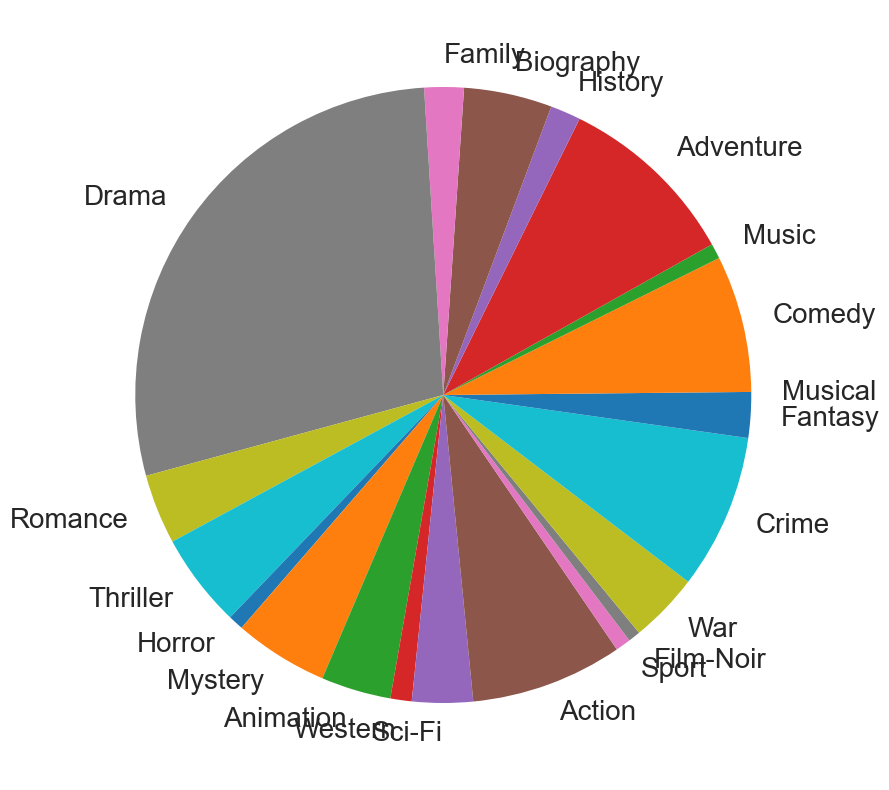

In [26]:
plt.pie(genre_df['frequency'], labels=genre_df['genre'])
plt.show()

Analisando tanto a tabela quanto o gráfico, podemos notar que a maioria dos filmes são de gênero `Drama` e `Adventure`, equanto apenas um filme é do gênero `Musical`.

### Análise da coluna `duration`

Inicialmente, vamos criar um histograma para visualizar a distribuição da duração dos filmes.

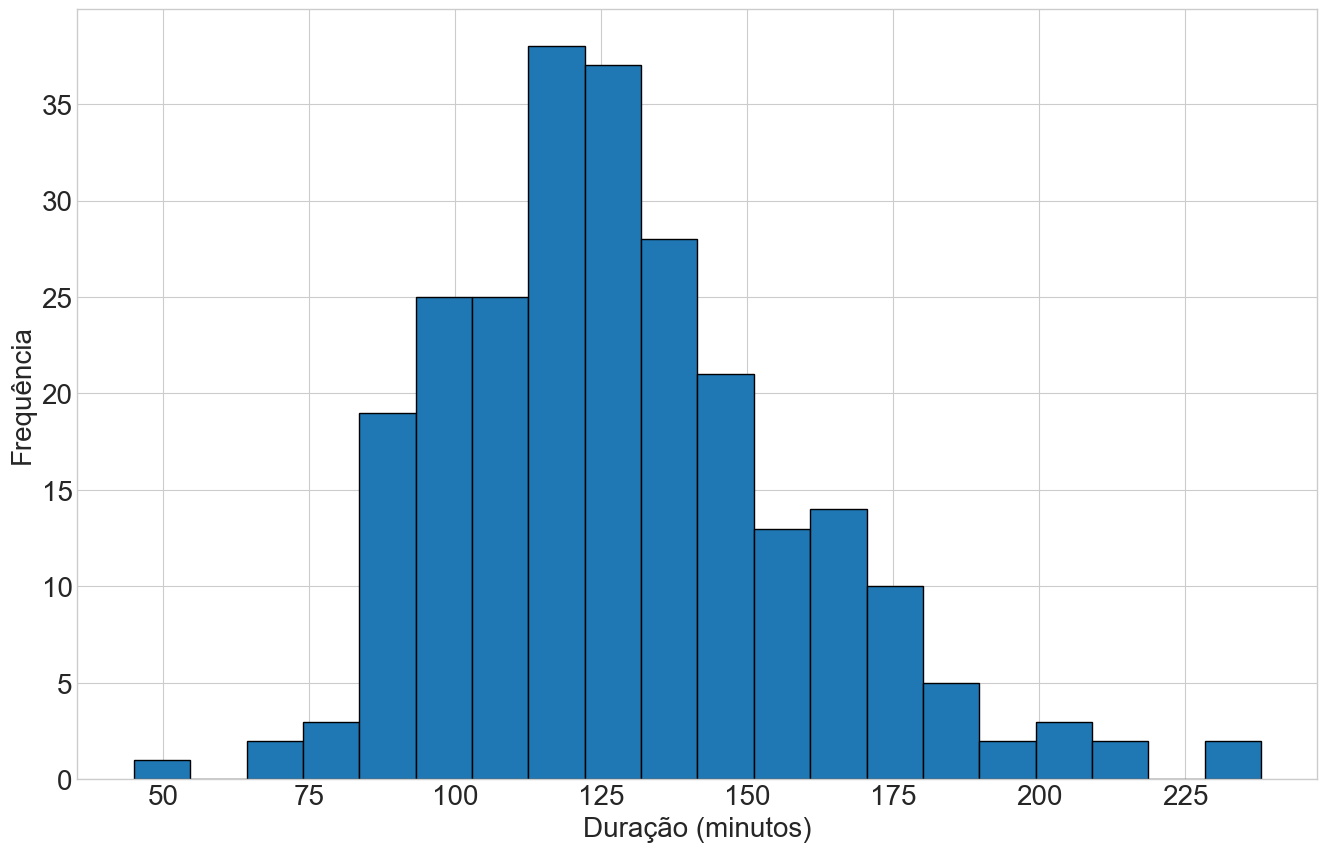

In [13]:
plt.hist(df["duration"], bins=20, edgecolor='black')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.show()

Analisando o histograma, podemos notar que a maioria dos filmes tem duração entre 80 e 150 minutos, enquanto poucos filmes tem duração inferior a 75 ou superior a 200 minutos. Vamos então descobrir qual a duração do menor e do maior filme da lista.

In [56]:
print('Menor valor: ', df['duration'].min())
print('Maior valor: ', df['duration'].max())

Menor valor:  45
Maior valor:  238


In [74]:
df[df['duration'] == 45]

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
194,195,tt0015324,Sherlock Jr.,1924,https://www.imdb.com/title/tt0015324,51440,8.2,Passed,45,"Action,Comedy,Romance",...,nm0000036,Buster Keaton,"nm0369841,nm0593477,nm0115669","Jean C. Havez,Joseph A. Mitchell,Clyde Bruckman","A film projectionist longs to be a detective, ...","ur1174211,ur5527588,ur4103165,ur0137908,ur0100...","Snow Leopard,imogensara_smith,Xstal,didi-5,up2...","rw0003413,rw1473937,rw6102574,rw1476358,rw1306...","Astounding Creativity,Through the Movie Screen...",It's almost impossible to describe the astound...


In [75]:
df[df['duration'] == 238]

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
158,159,tt0031381,Gone with the Wind,1939,https://www.imdb.com/title/tt0031381,319434,8.2,Passed,238,"Drama,Romance,War",...,"nm0281808,nm0002030,nm0939992","Victor Fleming,George Cukor,Sam Wood","tt0031381,nm0593565,nm0397608,nm0308177,tt0031381","Writers,Margaret Mitchell,Sidney Howard,Oliver...",American motion picture classic in which a man...,"ur1406078,ur2483625,ur2467618,ur4103165,ur5843...","jotix100,bkoganbing,planktonrules,Xstal,Turani...","rw1026203,rw1503022,rw1439927,rw6134854,rw5817...","Georgia on my mind,Scarlett's So High Spirited...",This film shows the best of the American cinem...


O filme com a duração mais curta é o Sherlock Jr. de 1924, com 45 minutos, enquanto o filme com a duração mais longa é o Gone with the Wind de 1939, com 238 minutos, o que é igual a 3 horas e 58 minutos.

### Média e Mediana

Apesar de poucos os filmes com menos de 80 minutos de exibição e mais de 200 minutos, vamos verificar se a média e a mediana fica distante comparado a nossa visualização no histograma.

Média:  129.132
Mediana:  126.5


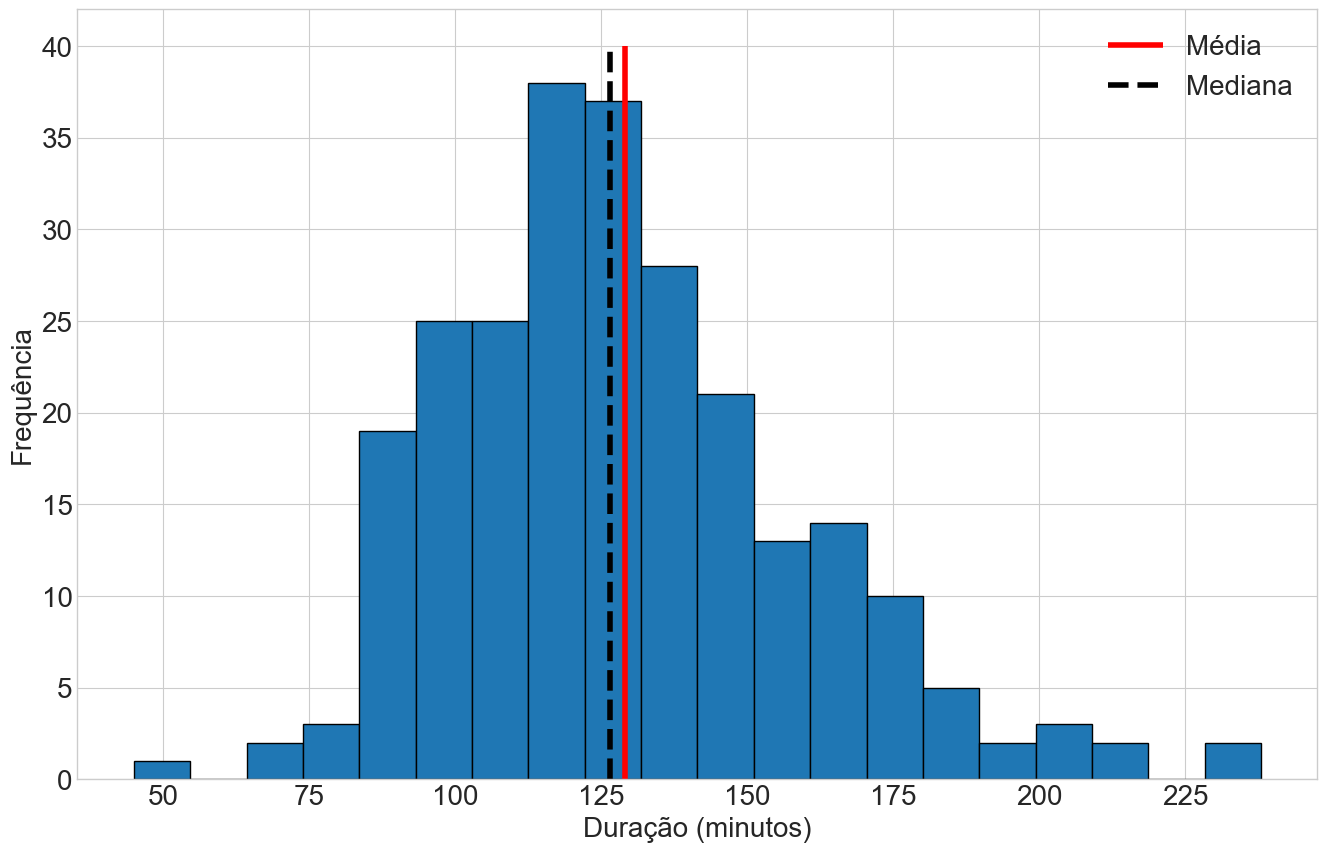

In [68]:
# Média
print('Média: ', df['duration'].mean())
print('Mediana: ', df['duration'].median())

# Gráfico de média
plt.hist(df["duration"], bins=20, edgecolor='black')
plt.vlines(df['duration'].mean(), 0, 40, label='Média', color='red')
plt.vlines(df['duration'].median(), 0, 40,
           linestyles='--', label='Mediana', color='black')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

A média de duração dos filmes é de 129 minutos, enquanto a mediana é de 120 minutos. Podemos notar que a média é maior que a mediana, o que indica que a distribuição é assimétrica à direita, ou seja, a maioria dos filmes tem duração inferior a 129 minutos.

### Moda

Vamos agora calcular a moda da duração dos filmes.

In [70]:
def mode(data):
    data = np.asanyarray(data)
    unique, counts = np.unique(data, return_counts=True)
    max_count = counts.max()
    return unique[counts == max_count]

In [71]:
mode(df['duration'])

array([130])

Podemos concluir que a moda é de 130 minutos, ou seja, a maioria dos filmes tem duração de 130 minutos, vamos então descobrir quais filmes são esses.

In [72]:
df[df['duration'] == 130]

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
20,21,tt0038650,It's a Wonderful Life,1946,https://www.imdb.com/title/tt0038650,467723,8.6,PG,130,"Drama,Family,Fantasy",...,nm0001008,Frank Capra,"tt0038650,nm0329304,nm0352443,nm0001008,tt0038650","Writers,Frances Goodrich,Albert Hackett,Frank ...",An angel is sent from Heaven to help a despera...,"ur2483625,ur0257957,ur20552756,ur0556711,ur027...","bkoganbing,Coxer99,TheLittleSongbird,FlickJunk...","rw1247136,rw0034395,rw2227530,rw0034473,rw0034...","""To My Big Brother George, The Richest Man In ...",I've always thought that the reason It's A Won...
23,24,tt0317248,City of God,2002,https://www.imdb.com/title/tt0317248,763772,8.6,R,130,"Crime,Drama",...,"nm0576987,nm0526199","Fernando Meirelles,Kátia Lund","nm0513130,nm1130251","Paulo Lins,Bráulio Mantovani","In the slums of Rio, two kids' paths diverge a...","ur20552756,ur1793363,ur2898520,ur2950767,ur441...","TheLittleSongbird,Decko_koji_obecava,SnoopySty...","rw3727515,rw0871139,rw3259235,rw0952393,rw0980...","A Brazilian masterwork,Gangs of Rio,The Godfat...",Such an amazing film that deserves the accolad...
40,41,tt0482571,The Prestige,2006,https://www.imdb.com/title/tt0482571,1348423,8.5,PG-13,130,"Drama,Mystery,Sci-Fi",...,nm0634240,Christopher Nolan,"nm0634300,nm0634240,nm1793993","Jonathan Nolan,Christopher Nolan,Christopher P...","After a tragic accident, two stage magicians i...","ur4445210,ur69508929,ur19117722,ur0317399,ur12...","ccthemovieman-1,NpMoviez,murtaza_mma,DICK STEE...","rw1953427,rw4183972,rw2123478,rw1501763,rw1508...","Just As Intriguing The Second Time, Too!,Fanta...",I've seen this film twice now - about a year a...
112,113,tt1745960,Top Gun: Maverick,2022,https://www.imdb.com/title/tt1745960,541686,8.3,PG-13,130,"Action,Drama",...,nm2676052,Joseph Kosinski,"tt1745960,nm0143596,nm0258390,nm0185976,tt1745960","Writers,Jim Cash,Jack Epps Jr.,Peter Craig,","After thirty years, Maverick is still pushing ...","ur64798417,ur82936063,ur59184301,ur1346534,ur8...","Top_Dawg_Critic,scottedwards-87359,goshamorrel...","rw8168012,rw8177338,rw8173679,rw8178255,rw8177...","The truly epic blockbuster we needed.,This is ...","Wow. The first Top Gun is a classic, and as we..."
132,133,tt6966692,Green Book,2018,https://www.imdb.com/title/tt6966692,505845,8.2,PG-13,130,"Biography,Comedy,Drama",...,nm0268380,Peter Farrelly,"nm0885014,nm0192942,nm0268380","Nick Vallelonga,Brian Hayes Currie,Peter Farrelly",A working-class Italian-American bouncer becom...,"ur0278527,ur15311310,ur87850731,ur39322316,ur2...","Hitchcoc,Sleepin_Dragon,MrHeraclius,Instant_Pa...","rw4591778,rw6517374,rw5483344,rw5855443,rw4477...","I Was Captivated,A captivating watch, with sen...",I saw Don Shirley perform in college in 1966. ...
139,140,tt0105695,Unforgiven,1992,https://www.imdb.com/title/tt0105695,416587,8.2,R,130,"Drama,Western",...,nm0000142,Clint Eastwood,nm0672459,David Webb Peoples,Retired Old West gunslinger William Munny relu...,"ur16161013,ur18970655,ur4939636,ur0715578,ur12...","hitchcockthelegend,Fella_shibby,jluis1984,cath...","rw2399163,rw4085446,rw1602983,rw0314659,rw1227...",That's right. I'm just a fella now. I ain't no...,William Munny (Clint Eastwood taking the lead ...
155,156,tt0071315,Chinatown,1974,https://www.imdb.com/title/tt0071315,331260,8.2,R,130,"Drama,Mystery,Thriller",...,nm0000591,Roman Polanski,"nm0001801,nm0000591","Robert Towne,Roman Polanski",A private detective hired to expose an adulter...,"ur67306446,ur1002035,ur0384847,ur0819382,ur139...","ArtVandelayImporterExporter,bob the moo,nycrit...","rw5234910,rw0991014,rw0134510,rw0134425,rw4459...","I hated this movie,A very classy, consistently...",The first time I saw it. After one of my buddi...
179,180,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011,https://www.imdb.com/title/tt1201607,889002,8.1,

Temos então um total de 9 filmes com 130 minutos de duração, sendo eles:
- It's a Wonderful Life (1946)
- City of God (2002)
- The Prestige (2006)
- Top Gun: Maverick (2022)
- Green Book (2018)
- Unforgiven (1992)
- Chinatown	(1974)
- Harry Potter and the Deathly Hallows: Part 2 (2011)
- Rebecca (1940)